#### Predict automobile price using Machine Learning

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)

# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

#For Visualising the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set_color_codes()
# plt.style.use('fivethirtyeight') 


#Linear regression
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Reading the dataset
car = pd.read_csv(r"C:\Users\vikrant\Desktop\board infinity\ML prjt\AutoData (1).csv")

In [5]:
# Checking few rows of the dataset to get its feel
car.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
car.shape

(205, 25)

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

We can observe that there are few columns that need data type correction.

In [8]:
# Checking for missing value
null_values = round(car.isnull().sum()/len(car.index) *100,2)
null_values.sort_values(ascending = False)

price               0.0
carheight           0.0
make                0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
curbweight          0.0
highwaympg          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
symboling           0.0
dtype: float64

We can observe that there are no missing values in any of the 26 columns of the datasets.

In [9]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
car.describe(include = ['object'])

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corolla,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


From the above description, we can see that most of the data is well distributed. We will confirm the same from further Exploratory data analysis.

In [11]:
# Data Type Correction
car['carbody'] = car['carbody'].astype(object)
car['symboling'] = car['symboling'].astype(object)

In [12]:
# Handling misspelled data
car.make.unique ()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In the column make,We can observe following discrepancies:

mazda car has been misspelled as maxda at many places
porsche has been misspelled as porcshce
toyota car has been mentioned as toyouta
Nissan has been referred as nissan in some cases
Volkswagen car has been misspelled as vokswagen and vw

In [13]:
car['make'] = car['make'].replace({"maxda": "mazda","porcshce": "porsche","toyouta": "toyota",
                                   "nissan": "Nissan","vokswagen": "volkswagen","vw": "volkswagen"})

In [14]:
car.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

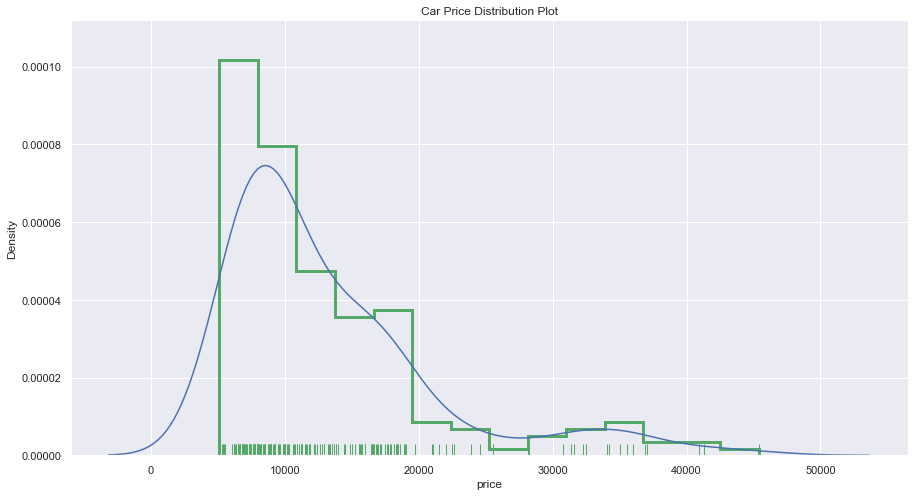

In [15]:
#Visualising dependent Variable - Target variable
plt.figure(figsize=(15,8))

# plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')

# sns.distplot(car.price, rug=True, color="y")
sns.distplot(car.price, rug=True, rug_kws={"color": "g"},
            hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"})

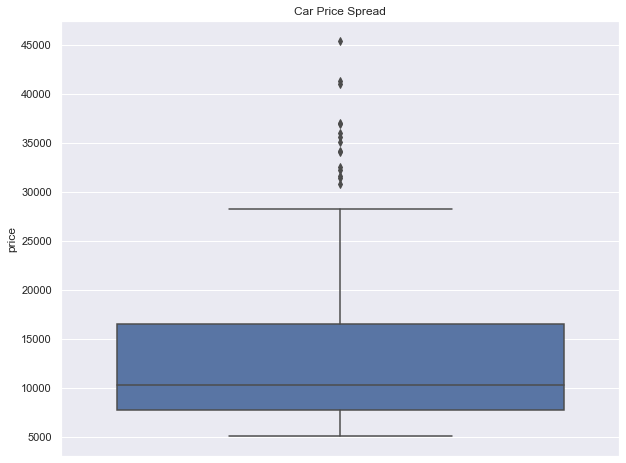

In [16]:
plt.figure(figsize=(10,8))
plt.title('Car Price Spread')
sns.boxplot(y=car.price)

plt.show()

In [17]:
car['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

From the above plots and description we infer following things:

The density curve is right-skewed, which indicates that most of the prices are low.
From the boxplot it is evident that there is is a significant difference between the mean and the median of the price distribution.
The extreme values lying above the whiskers in the boxplot indicate outliers but since our dataset is small, we choose not to deal with outliers.
The significant difference between between the 75th percentile and maximum price value also indicates outliers.

In [18]:
# Segregating data according to datatypes
car_obj = car.select_dtypes(include = 'object')
car_obj.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [19]:
car_obj.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


Let us observe the impact of these categorical variables on price

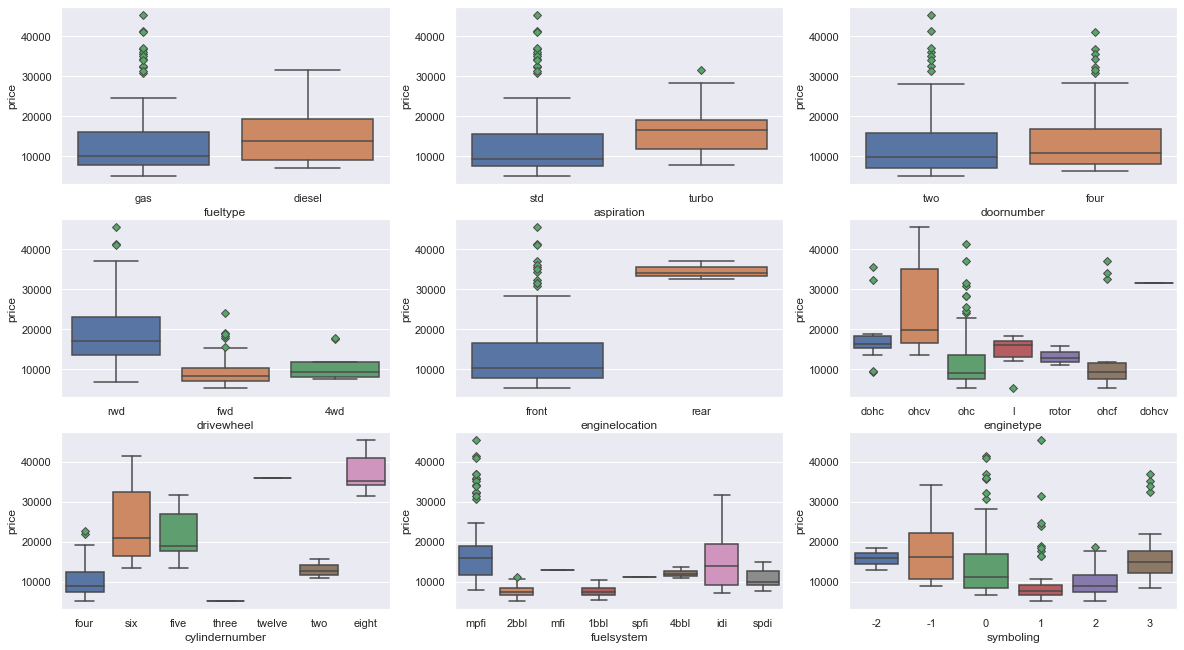

In [20]:
plt.figure(figsize =(20,15))
green_diamond = dict(markerfacecolor='g', marker='D')

plt.subplot(4,3, 1)
sns.boxplot(y='price', x='fueltype', data= car, flierprops=green_diamond)

plt.subplot(4,3, 2)
sns.boxplot(y='price', x='aspiration', data= car, flierprops=green_diamond)

plt.subplot(4,3, 3)
sns.boxplot(y='price', x='doornumber', data= car, flierprops=green_diamond)

plt.subplot(4,3, 4)
sns.boxplot(y='price', x='drivewheel', data= car, flierprops=green_diamond)

plt.subplot(4,3, 5)
sns.boxplot(y='price', x='enginelocation', data= car, flierprops=green_diamond)

plt.subplot(4,3, 6)
sns.boxplot(y='price', x='enginetype', data= car, flierprops=green_diamond)

plt.subplot(4,3, 7)
sns.boxplot(y='price', x='cylindernumber', data= car, flierprops=green_diamond)

plt.subplot(4,3, 8)
sns.boxplot(y='price', x='fuelsystem', data= car, flierprops=green_diamond)

plt.subplot(4,3, 9)
sns.boxplot(y='price', x='symboling', data= car, flierprops=green_diamond)

plt.show()

a) This ordinal categorical column indicates assigned insurance risk rating. It has values ranging from -2 to 3. These values indicate assigned insurance risk rating, '-2' being high risk and '3' being pretty safe.
cars with risk rating -1 are more expensive
Cars with insurance risk rating 1 are the cheapest.
b.) Fueltype - Cars with fueltype DIESEL are more expensive

c.) Aspiration - Cars with Turbo aspiration are more expensive

d.) Doornumber

Although Cras with four numbner of doors are more expensive than the ones with 2 number of doors only, there is no significant difference in the price
Thus this variable does not affect the price much.
e.) Drivewheel - Cars with rwd are more expensive than fwd cars

f.) Enginelocation

There is significant difference in pricing of cars whose engine is located in rear and front.
Cars whose engine is located in the rear are much more expensive than the other cars.
g.) Engine type - Cars with engine type ohcv are more expensive than the other types of cars.

h.) Cylinder number - Cras with eight cylinders are very expensive as compared to other cars.

i.) Fuelsystem - Cars with idior mpfi fuelsystem are more expensive as compared to others.

<Figure size 1080x720 with 0 Axes>

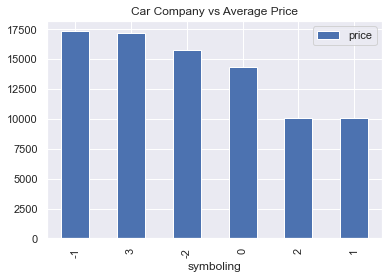

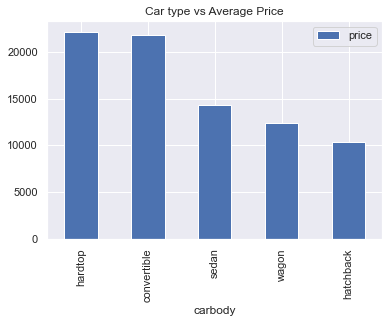

In [37]:
## Let us also observe how brand name and car body affect price
make_gp = car.pivot_table(values = 'price', index = 'symboling',aggfunc ='mean').sort_values(by ='price', ascending = False)
body_gp = car.pivot_table(values = 'price', index = 'carbody',aggfunc ='mean').sort_values(by ='price', ascending = False)

plt.figure(figsize=(15,10))

make_gp.plot.bar()
plt.title('Car Company vs Average Price') # symboling represents the brand name

body_gp.plot.bar()
plt.title('Car type vs Average Price')

plt.show()

Cars of the company buick regal sport coupe (turbo) are among the most expensive cars than the cars by other companies.
Cars of the type hardtop and convertible are more pricey than other types of cars.

In [20]:
# Segregating data according to datatype
car_num = car.select_dtypes(exclude = 'object')
car_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
# Observing the correlation among these numerical predictor variables
car_num.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


visualising impact of car dimensionson on price of the car

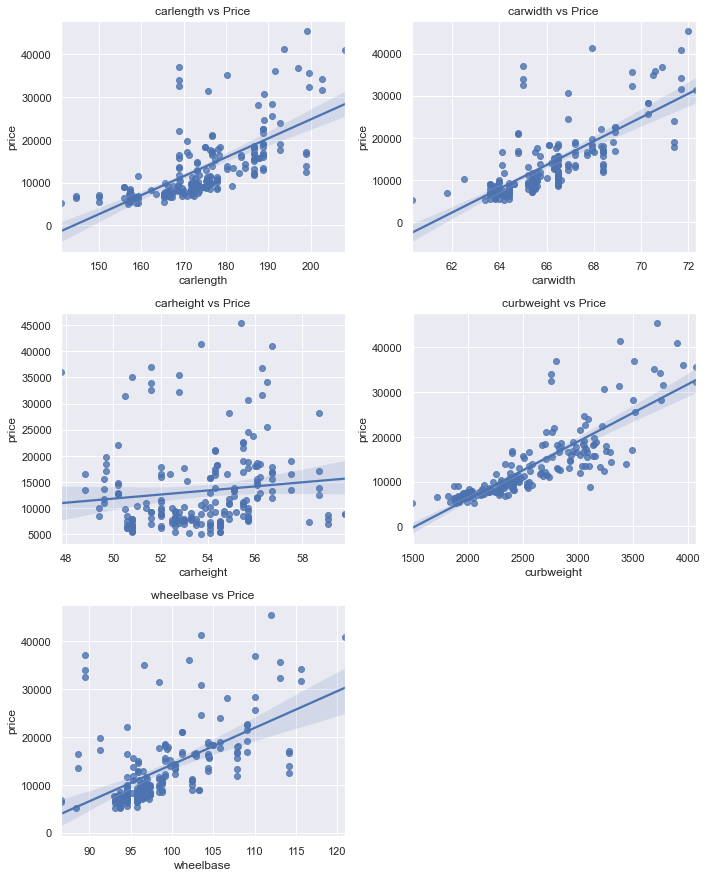

In [22]:
def regplot(x,fig):
    plt.subplot(5,2,fig)
    sns.regplot(car[x],car['price'])
    plt.title(x +' '+'vs Price')
    plt.ylabel('price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

regplot('carlength', 1)
regplot('carwidth', 2)
regplot('carheight', 3)
regplot('curbweight', 4)
regplot('wheelbase', 5)

plt.tight_layout()


OBSERVATIONS:

1) We observe that carwidth, curbweight and wheel base have high positive correlation with the target variable -price.
2) From the above scatter plots we see that there are many outliers in our dataset. Since our dataset is small, we choose not to deal with them.

In [23]:
# Let us observe the correlation among these variables
car_dim = ['carlength','carwidth','carheight','curbweight','wheelbase','price']
car[car_dim].corr()

,carlength,carwidth,carheight,curbweight,wheelbase,price
carlength,1.000000,0.841118,0.491029,0.877728,0.874587,0.682920
carwidth,0.841118,1.000000,0.279210,0.867032,0.795144,0.759325
carheight,0.491029,0.279210,1.000000,0.295572,0.589435,0.119336
curbweight,0.877728,0.867032,0.295572,1.000000,0.776386,0.835305
wheelbase,0.874587,0.795144,0.589435,0.776386,1.000000,0.577816
price,0.682920,0.759325,0.119336,0.835305,0.577816,1.000000


Visualizing impact of other car features on price of the car

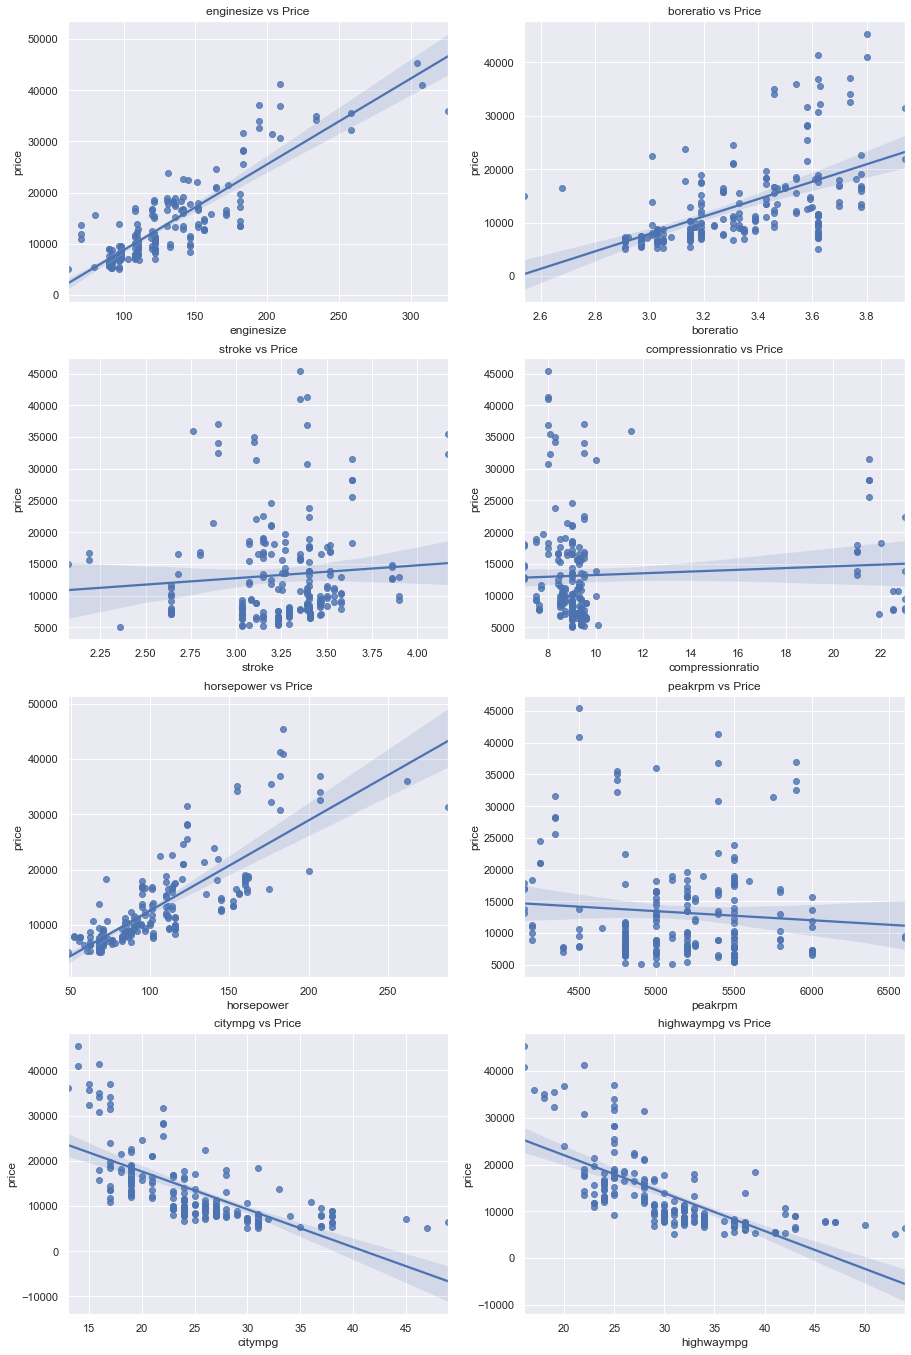

In [24]:

# Other features of the car
plt.figure(figsize=(15,30))

regplot('enginesize',1)
regplot('boreratio',2)
regplot('stroke',3)
regplot('compressionratio',4)
regplot('horsepower',5)
regplot('peakrpm',6)
regplot('citympg',7)
regplot('highwaympg',8)


OBSERVATIONS:

1) We observe that enginesize and horsepower have high positive correlation with the target variable -price.
2) We observe that citympg and highwaympg have high negative correlation with the target variable -price.
3) From the above scatter plots we see that there are many outliers in our dataset. Since our dataset is small, we choose not to deal with them.

In [25]:
car_num.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000



From the above percentiles, we observe that there are many outliers in our dataset. Since our dataset is small, we choose not to deal with them.

In [26]:
# Let us observe the correlation among these variables
car_features = ['enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
car[car_features].corr()

,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
enginesize,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139
peakrpm,-0.244660,-0.254976,-0.067964,-0.435741,0.131073,1.000000,-0.113544,-0.054275,-0.085267
citympg,-0.653658,-0.584532,-0.042145,0.324701,-0.801456,-0.113544,1.000000,0.971337,-0.685751
highwaympg,-0.677470,-0.587012,-0.043931,0.265201,-0.770544,-0.054275,0.971337,1.000000,-0.697599
price,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,1.000000


From the above regression plots and correlation matrix, we can observe that there are few features that impact the price of the car to a great extent:

carlength
carwidth
curbweight
enginesize
horsepower
citympg
highwaympg
boreratio
wheelbase

Now let us observe the correlation between these important features within themselves as this affects the behaviour of the model.

<AxesSubplot:>

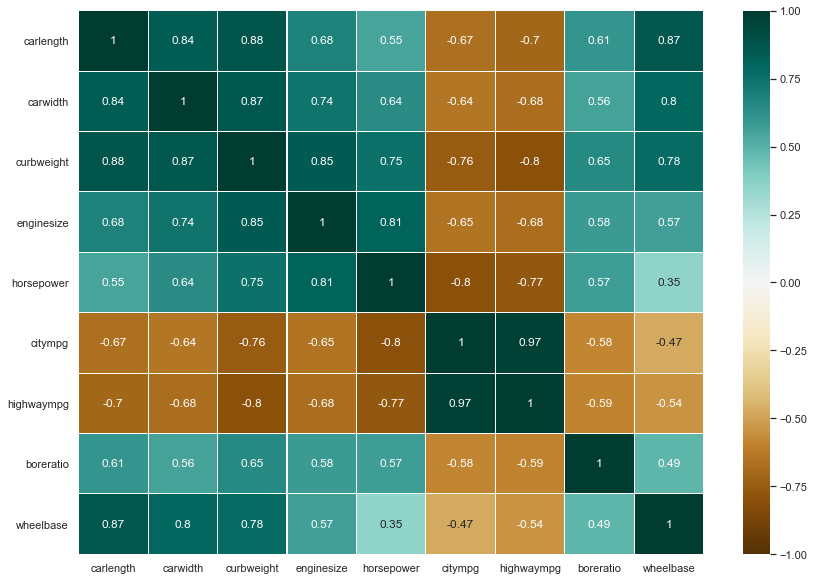

In [27]:
plt.figure(figsize = (14,10))

num_features = ['carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','boreratio','wheelbase']
sns.heatmap(car[num_features].corr(), annot = True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
# cmap = 'Blues'

From the above plots and summary, let us select few important features that affect price(target variable) to a great extent. This manual feature selection in the intial stages helps in bulding a good model.

In [28]:
car_lm = car[['symboling','fueltype','aspiration','drivewheel','carbody','cylindernumber',
                'enginetype','enginelocation','carlength','carwidth','curbweight','enginesize','horsepower','citympg',
                'highwaympg','boreratio','wheelbase','make','price']]
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,boreratio,wheelbase,make,price
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero giulia,13495.0
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero stelvio,16500.0
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,19,26,2.68,94.5,alfa-romero Quadrifoglio,16500.0
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,24,30,3.19,99.8,audi 100 ls,13950.0
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,18,22,3.19,99.4,audi 100ls,17450.0


In [29]:

car_lm.shape

(205, 19)

We have selected 19 features out of 25 features. Let us proceed towards our next step which is model building.

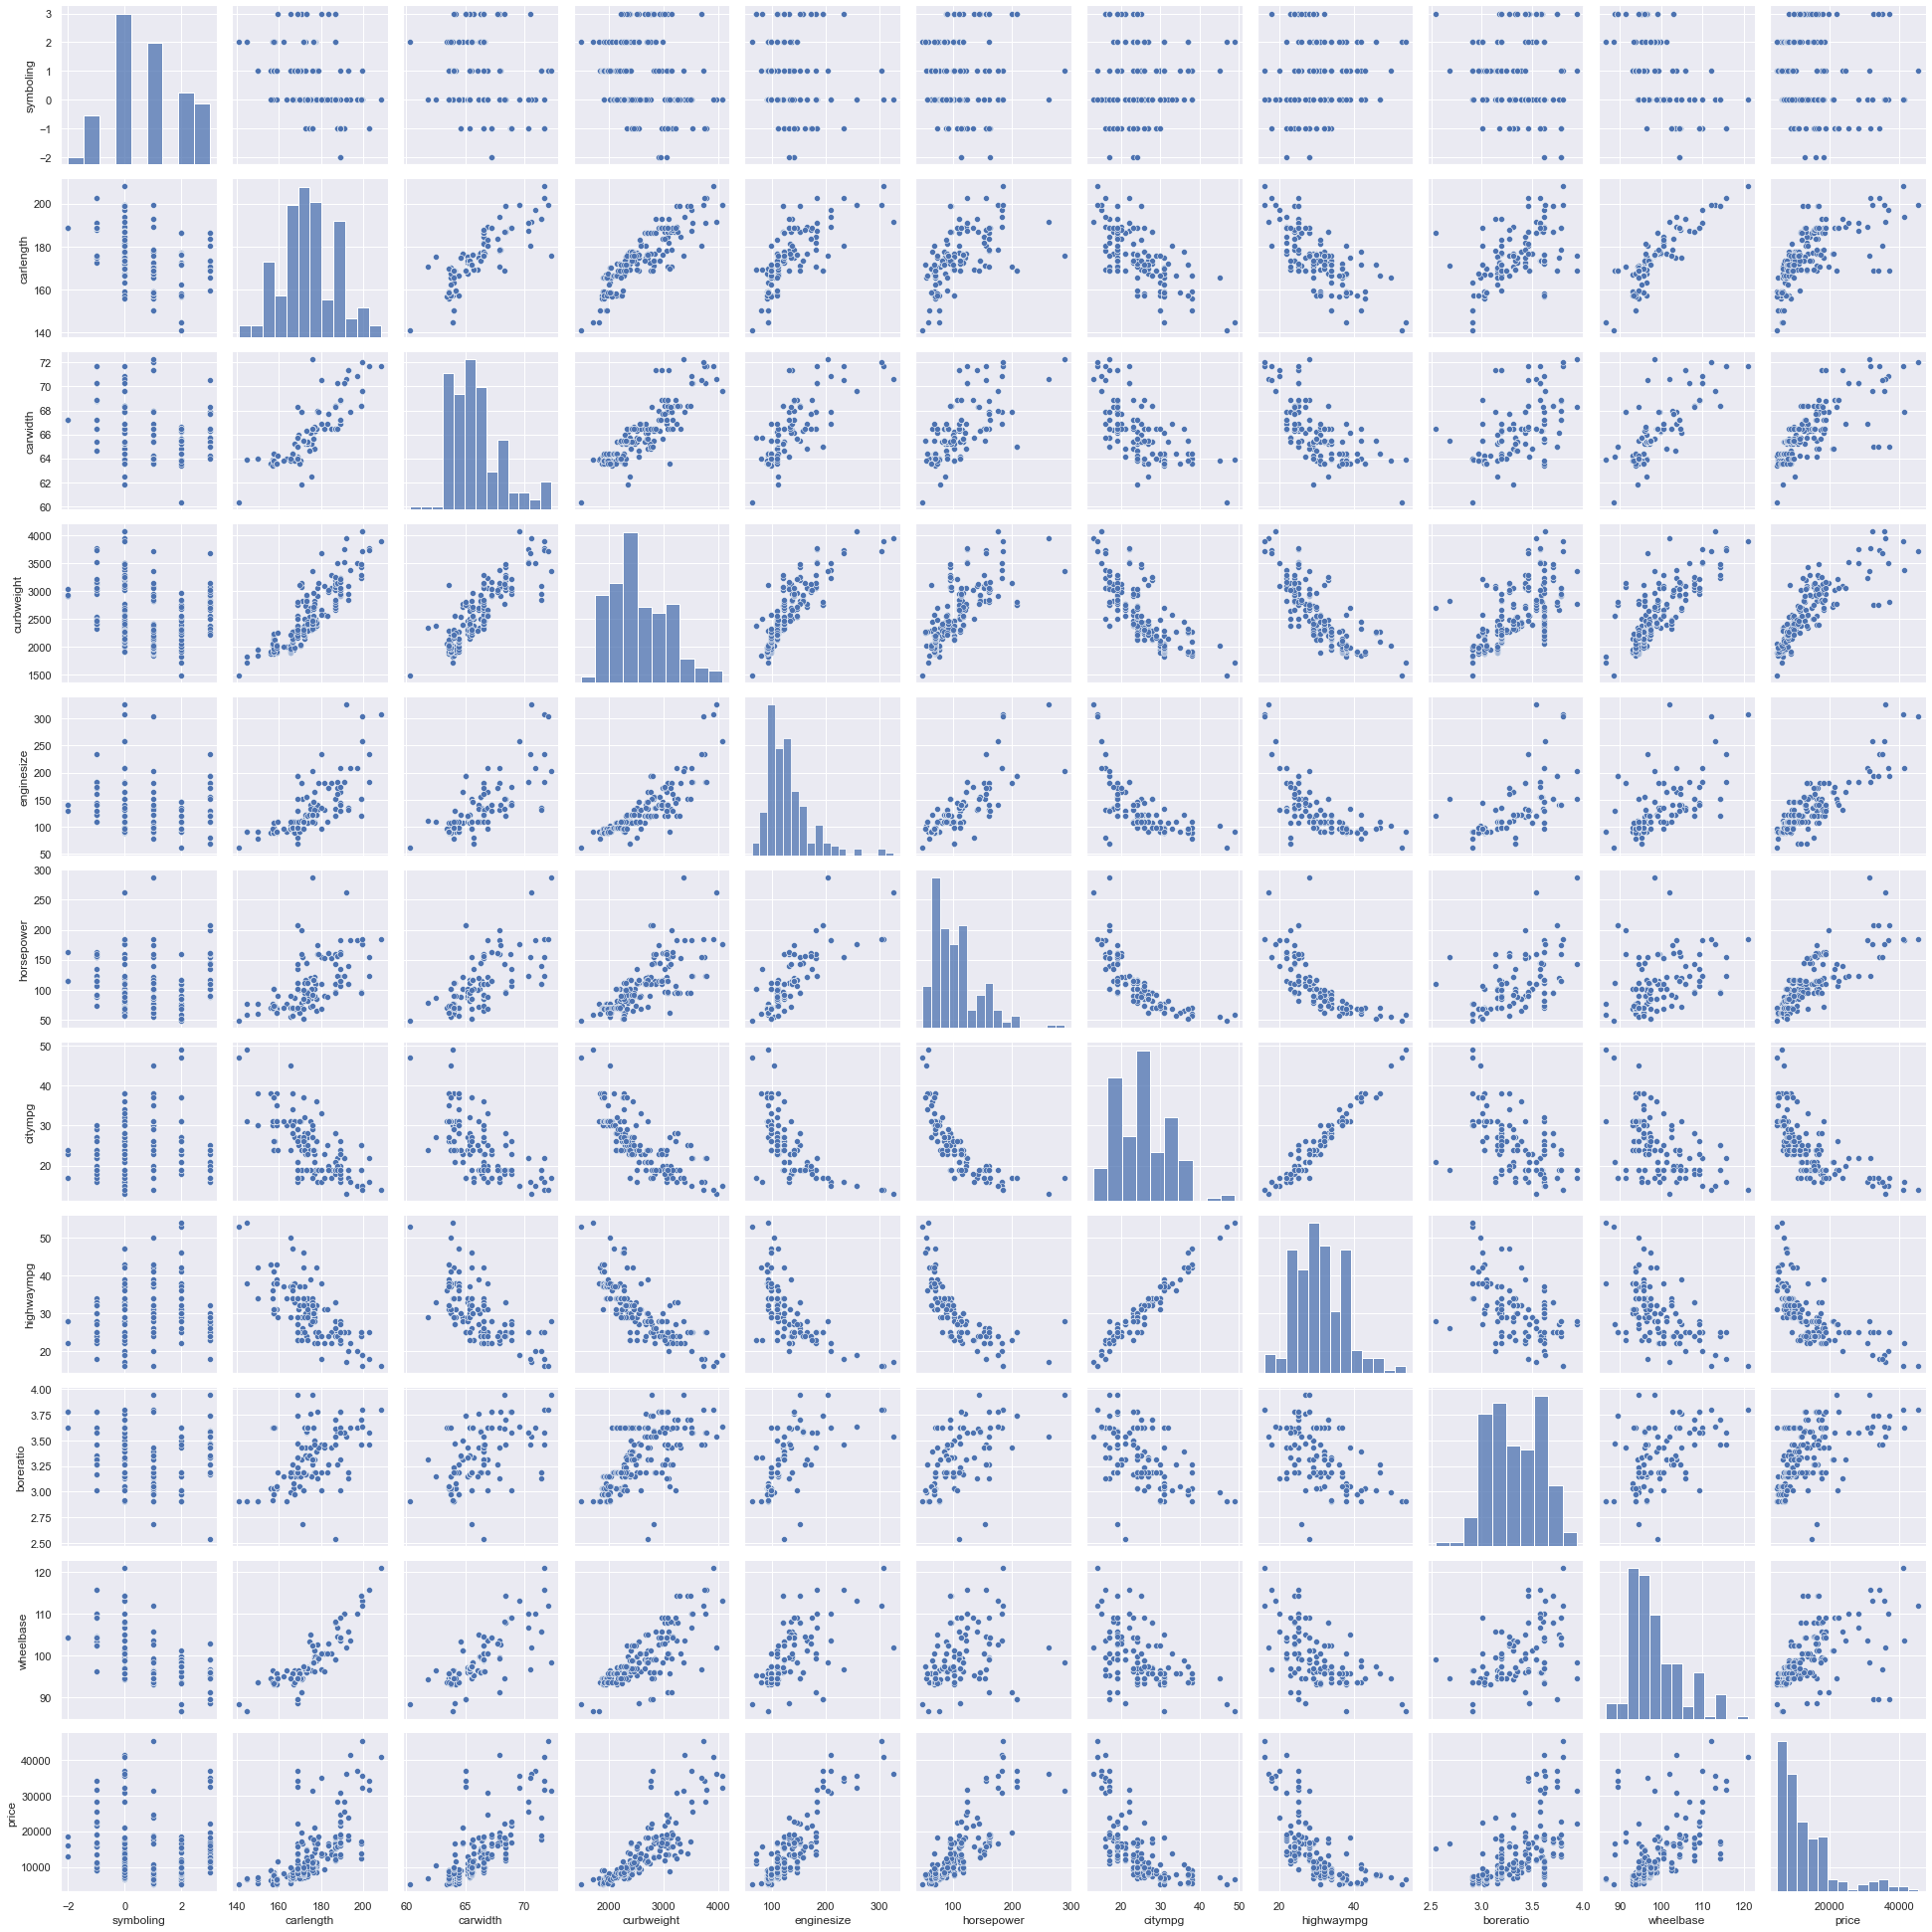

In [30]:
# Let us observe correlation among these selected features
sns.pairplot(car_lm , palette="dark green")
plt.show()

In [31]:
# Deriving new metrics
car_lm['fuel_economy'] = (0.45 * car_lm['highwaympg']) + (0.55 * car_lm['citympg'])

# dropping citympg and highwaympg from the dataset
car_lm = car_lm.drop(['citympg','highwaympg'],axis=1)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,make,price,fuel_economy
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,alfa-romero giulia,13495.0,23.70
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,alfa-romero stelvio,16500.0,23.70
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,alfa-romero Quadrifoglio,16500.0,22.15
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,audi 100 ls,13950.0,26.70
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,audi 100ls,17450.0,19.80



From the visualisation of categorical variables, we observe that car company is also the governing factor for predicting the price of the car. Luxury cars seem more expensive

In [41]:
make_gp = car.pivot_table(values = 'price', index = 'make',aggfunc ='mean').sort_values(by ='price', ascending = False)
make_gp['price-1'] = make_gp['price']
make_gp = make_gp.drop('price',axis=1)
make_gp

,price-1
make,
buick regal sport coupe (turbo),45400.0
bmw x5,41315.0
buick century special,40960.0
porsche boxter,37028.0
jaguar xk,36000.0
...,...
Nissan versa,5499.0
mitsubishi mirage,5389.0
toyota corona mark ii,5348.0


In [33]:
make_gp = car_lm.merge(make_gp.reset_index(), how='left',on='make')

bins = np.linspace(min(make_gp['price-1']), max(make_gp['price-1']),4)

bin_name=['Economic','Medium','Luxury']

car_lm['class'] = pd.cut(make_gp['price-1'], bins, right=False, labels = bin_name, include_lowest = True)

# converting datatype of class to object
car_lm['class'] = car_lm['class'].astype(object)

#dropping the column make from the dataset
car_lm = car_lm.drop('make',axis =1)

car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Economic
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Economic


In [34]:
#Ordinal categorical variables
rating_dict = {-3: 0,-2:1 ,-1: 2, 0: 3,1: 4,2: 5,3: 6}

car_lm['symboling'] = car_lm['symboling'].map(rating_dict)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic
1,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic
2,4,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic
3,5,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Economic
4,5,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Economic


In [35]:
#Creating Dummy Variables
#Let us create dummy variables for categorical columns to see which feature has significant influence on price.
dum = car_lm.select_dtypes(include = 'object')
dummy = pd.get_dummies(dum, prefix=["fuel","aspiration","drive","body","cylindernum","engine",
                                         "engineloc" ,'class'], drop_first = True)
dummy.head()

,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [36]:
dummy.shape

(205, 23)

In [37]:
# Add the results to the original car dataframe

car_lm = pd.concat([car_lm, dummy], axis = 1)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,5,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Economic,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Economic,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [38]:

# drop duplicate columns
del_list = dum.columns
car_lm = car_lm.drop(del_list, axis = 1)
car_lm.head()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,6,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,5,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [39]:
car_lm.shape
print("Our Final dataset has",car_lm.shape[0],'number of rows')
print("Our Final dataset has",car_lm.shape[1],'number of columns')

Our Final dataset has 205 number of rows
Our Final dataset has 33 number of columns


In [40]:
#Splitting the Data and feature scaling
#Train-Test split data
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
car_train, car_test = train_test_split(car_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
#Feature scaling- Minmax scaling (normalisation)
# Applying scaler() to all the columns except the 'binary' and 'dummy' variables
num_vars = ['symboling','carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
           'boreratio', 'wheelbase', 'price', 'fuel_economy']

scaler = MinMaxScaler()
car_train[num_vars] = scaler.fit_transform(car_train[num_vars])

car_train.head()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
122,0.6,0.426016,0.291667,0.272692,0.139623,0.083333,0.230159,0.244828,0.068818,0.530864,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
125,1.0,0.452033,0.666667,0.500388,0.339623,0.395833,1.000000,0.272414,0.466890,0.213992,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
166,0.6,0.448780,0.308333,0.314973,0.139623,0.266667,0.444444,0.272414,0.122110,0.344307,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.450407,0.316667,0.411171,0.260377,0.262500,0.626984,0.068966,0.314446,0.244170,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.2,0.775610,0.575000,0.647401,0.260377,0.475000,0.746032,0.610345,0.382131,0.122085,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [42]:
# Let us observe the scaled data
car_train.describe()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.525476,0.461655,0.407878,0.241351,0.227302,0.497946,0.411141,0.219310,0.358265,0.909091,0.181818,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.006993,0.055944,0.104895
std,0.239200,0.204848,0.184517,0.211269,0.154619,0.165511,0.207140,0.205581,0.215682,0.185980,0.288490,0.387050,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.083624,0.230621,0.307495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.399187,0.304167,0.245539,0.135849,0.091667,0.305556,0.272414,0.067298,0.198903,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.502439,0.425000,0.355702,0.184906,0.191667,0.500000,0.341379,0.140343,0.344307,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.669919,0.550000,0.559542,0.301887,0.283333,0.682540,0.503448,0.313479,0.512346,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can observe that after scaling, our data now falls between the range 0 and 1.

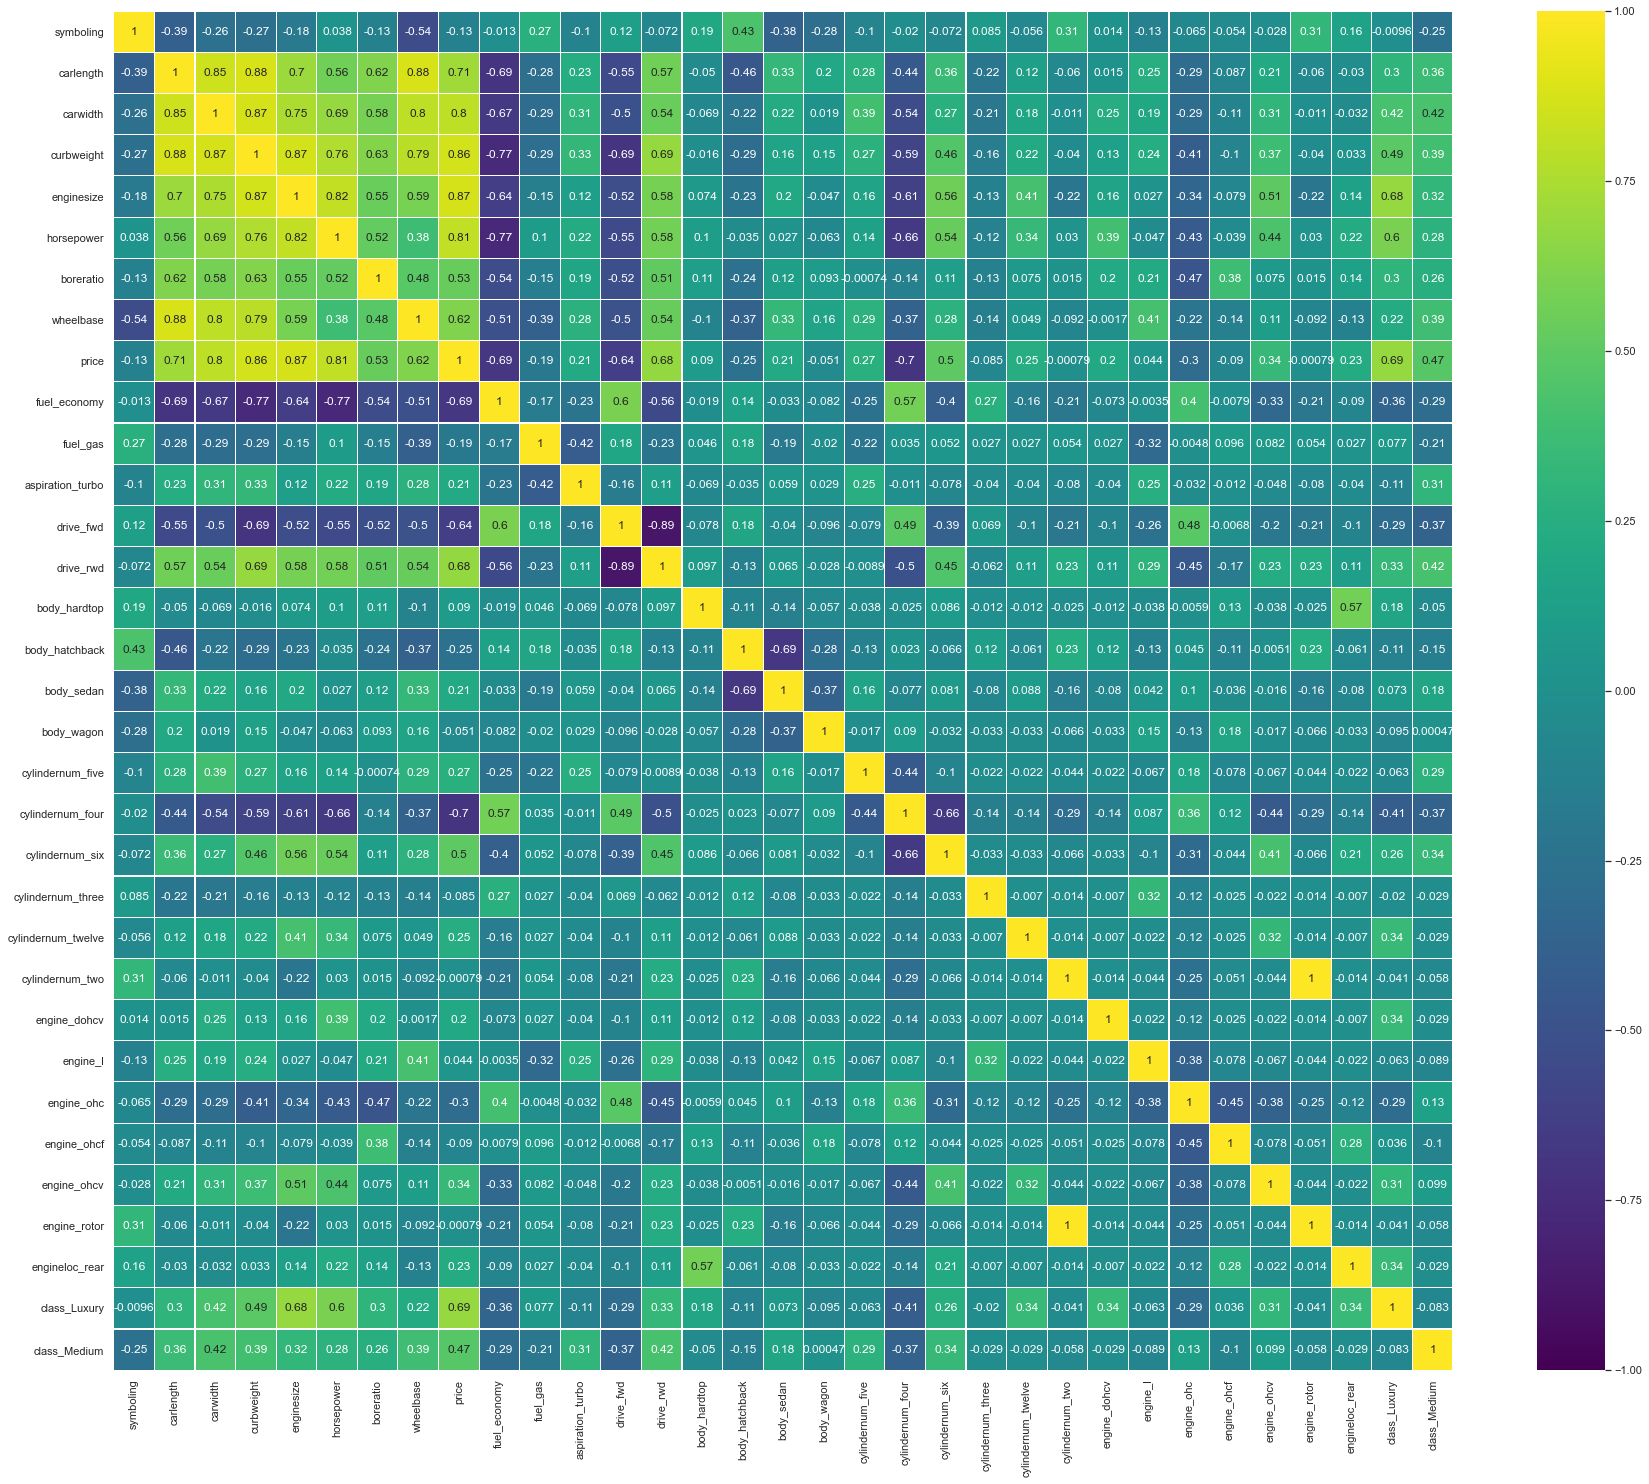

In [43]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
# sns.heatmap(car_train.corr(), annot = True, cmap="YlGnBu")

sns.heatmap(car_train.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)
plt.show()

In [44]:
#Dividing train set into X and Y sets for the model building
y_train = car_train.pop('price')
X_train = car_train

##### Building a linear regression model

#We will be using Recursive feature elimination technique(RFE)

#Adopting RFE technique to select the features

In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 11)                # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 7),
 ('carlength', False, 14),
 ('carwidth', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('horsepower', True, 1),
 ('boreratio', False, 4),
 ('wheelbase', True, 1),
 ('fuel_economy', False, 5),
 ('fuel_gas', False, 2),
 ('aspiration_turbo', False, 15),
 ('drive_fwd', False, 9),
 ('drive_rwd', False, 19),
 ('body_hardtop', True, 1),
 ('body_hatchback', True, 1),
 ('body_sedan', True, 1),
 ('body_wagon', True, 1),
 ('cylindernum_five', False, 20),
 ('cylindernum_four', False, 3),
 ('cylindernum_six', False, 12),
 ('cylindernum_three', False, 11),
 ('cylindernum_twelve', False, 21),
 ('cylindernum_two', False, 17),
 ('engine_dohcv', True, 1),
 ('engine_l', False, 16),
 ('engine_ohc', False, 6),
 ('engine_ohcf', False, 10),
 ('engine_ohcv', False, 22),
 ('engine_rotor', False, 13),
 ('engineloc_rear', False, 18),
 ('class_Luxury', True, 1),
 ('class_Medium', True, 1)]

In [46]:
# List of columns selected by RFE technique
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'enginesize', 'horsepower', 'wheelbase', 'body_hardtop',
       'body_hatchback', 'body_sedan', 'body_wagon', 'engine_dohcv',
       'class_Luxury', 'class_Medium'],
      dtype='object')

#Building model using statsmodel, for the detailed statistics

##MODEL 1

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_1 = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_1)

lm_1 = sm.OLS(y_train,X_train_1).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     153.4
Date:                Mon, 31 May 2021   Prob (F-statistic):           3.63e-69
Time:                        01:48:50   Log-Likelihood:                 205.04
No. Observations:                 143   AIC:                            -386.1
Df Residuals:                     131   BIC:                            -350.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0456      0.035      1.

In [48]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,57.37
1,enginesize,28.67
3,wheelbase,25.12
2,horsepower,16.70
6,body_sedan,4.94
9,class_Luxury,2.92
5,body_hatchback,2.67
7,body_wagon,2.28
10,class_Medium,1.57
8,engine_dohcv,1.52


curbweight has high VIF so it can be dropped

MODEL 2

In [49]:
X_train_2 = X_train_1.drop(["curbweight"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_2 = sm.add_constant(X_train_2)

lm_2 = sm.OLS(y_train,X_train_2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     151.5
Date:                Mon, 31 May 2021   Prob (F-statistic):           3.03e-67
Time:                        01:48:50   Log-Likelihood:                 197.39
No. Observations:                 143   AIC:                            -372.8
Df Residuals:                     132   BIC:                            -340.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0901      0.035      2.

In [50]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,22.60
1,horsepower,12.46
2,wheelbase,11.52
5,body_sedan,4.80
8,class_Luxury,2.88
4,body_hatchback,2.63
6,body_wagon,2.22
9,class_Medium,1.57
7,engine_dohcv,1.49
3,body_hardtop,1.12


enginesize has high VIF so it can be dropped

MODEL 3

In [51]:
X_train_3 = X_train_2.drop(["enginesize"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_3 = sm.add_constant(X_train_3)

lm_3 = sm.OLS(y_train,X_train_3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     169.5
Date:                Mon, 31 May 2021   Prob (F-statistic):           2.29e-68
Time:                        01:48:51   Log-Likelihood:                 197.38
No. Observations:                 143   AIC:                            -374.8
Df Residuals:                     133   BIC:                            -345.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0887      0.033      2.

In [52]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,wheelbase,8.96
0,horsepower,6.13
4,body_sedan,4.72
3,body_hatchback,2.62
5,body_wagon,2.22
7,class_Luxury,2.06
8,class_Medium,1.54
6,engine_dohcv,1.28
2,body_hardtop,1.12


In [53]:
# Let us check correlation between the features to decide which has highest multicollinearity
X.corr()

,horsepower,wheelbase,body_hardtop,body_hatchback,body_sedan,body_wagon,engine_dohcv,class_Luxury,class_Medium
horsepower,1.000000,0.382758,0.103970,-0.035389,0.026685,-0.063235,0.393153,0.600054,0.281766
wheelbase,0.382758,1.000000,-0.103235,-0.371606,0.333352,0.162160,-0.001739,0.222370,0.388576
body_hardtop,0.103970,-0.103235,1.000000,-0.105689,-0.139386,-0.057301,-0.012284,0.176689,-0.050111
body_hatchback,-0.035389,-0.371606,-0.105689,1.000000,-0.687477,-0.282618,0.116231,-0.111641,-0.150985
body_sedan,0.026685,0.333352,-0.139386,-0.687477,1.000000,-0.372726,-0.079906,0.072862,0.176722
body_wagon,-0.063235,0.162160,-0.057301,-0.282618,-0.372726,1.000000,-0.032849,-0.095289,0.000470
engine_dohcv,0.393153,-0.001739,-0.012284,0.116231,-0.079906,-0.032849,1.000000,0.344729,-0.028727
class_Luxury,0.600054,0.222370,0.176689,-0.111641,0.072862,-0.095289,0.344729,1.000000,-0.083333
class_Medium,0.281766,0.388576,-0.050111,-0.150985,0.176722,0.000470,-0.028727,-0.083333,1.000000


#body_hardtop has high p-value; can be dropped

#model 4

In [54]:
X_train_4 = X_train_3.drop(["body_hardtop"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_4 = sm.add_constant(X_train_4)

lm_4 = sm.OLS(y_train,X_train_4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     182.5
Date:                Mon, 31 May 2021   Prob (F-statistic):           3.71e-68
Time:                        01:48:51   Log-Likelihood:                 194.01
No. Observations:                 143   AIC:                            -370.0
Df Residuals:                     134   BIC:                            -343.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0378      0.027      1.

In [55]:

# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_4.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,wheelbase,8.90
0,horsepower,5.89
3,body_sedan,4.56
2,body_hatchback,2.54
4,body_wagon,2.18
6,class_Luxury,2.05
7,class_Medium,1.53
5,engine_dohcv,1.26


#body_sedan has high p-value; can be dropped.

#model 5

In [56]:

X_train_5 = X_train_4.drop(["body_sedan"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_5 = sm.add_constant(X_train_5)

lm_5 = sm.OLS(y_train,X_train_5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 31 May 2021   Prob (F-statistic):           5.97e-67
Time:                        01:48:52   Log-Likelihood:                 188.17
No. Observations:                 143   AIC:                            -360.3
Df Residuals:                     135   BIC:                            -336.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0362      0.017     -2.

In [57]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_5.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,5.69
1,wheelbase,4.10
5,class_Luxury,1.89
2,body_hatchback,1.51
6,class_Medium,1.46
3,body_wagon,1.28
4,engine_dohcv,1.26


#class_Medium has high p-value; can be dropped.

#model 6.

In [58]:
X_train_6 = X_train_5.drop(["class_Medium"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_6 = sm.add_constant(X_train_6)

lm_6 = sm.OLS(y_train,X_train_6).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     128.7
Date:                Mon, 31 May 2021   Prob (F-statistic):           1.47e-53
Time:                        01:48:52   Log-Likelihood:                 152.72
No. Observations:                 143   AIC:                            -291.4
Df Residuals:                     136   BIC:                            -270.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0752      0.021     -3.

In [59]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_6.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,5.26
1,wheelbase,4.00
5,class_Luxury,1.71
2,body_hatchback,1.41
3,body_wagon,1.26
4,engine_dohcv,1.26


In [60]:
#engine_dohcv has high p-value; can be dropped.

#model 7.

In [61]:
X_train_7 = X_train_6.drop(["engine_dohcv"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_7 = sm.add_constant(X_train_7)

lm_7 = sm.OLS(y_train,X_train_7).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.5
Date:                Mon, 31 May 2021   Prob (F-statistic):           7.89e-53
Time:                        01:48:53   Log-Likelihood:                 148.26
No. Observations:                 143   AIC:                            -284.5
Df Residuals:                     137   BIC:                            -266.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0691      0.021     -3.

In [62]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_7.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,4.90
1,wheelbase,3.71
4,class_Luxury,1.65
2,body_hatchback,1.41
3,body_wagon,1.25


###### None of the VIF's are above 5 and from the summary we can see that none of them have significant p-value (> 0.05). So we can conclude that this is our final model.

#### Residual Analysis of the train data.

Normal Distribution of error terms

To check if the error terms are normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [63]:
y_train_pred = lm_5.predict(X_train_5)

Text(0.5, 0, 'Errors')

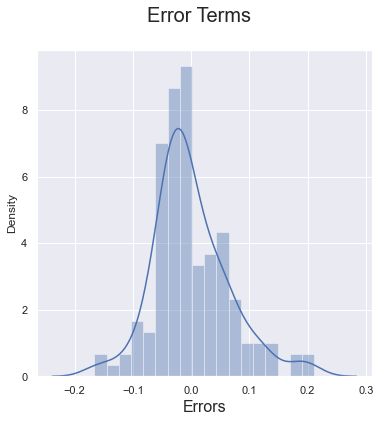

In [64]:

# plot the histogram of the error terms
fig = plt.figure(figsize=(6,6))
sns.distplot((y_train - y_train_pred), bins = 18)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 16)    

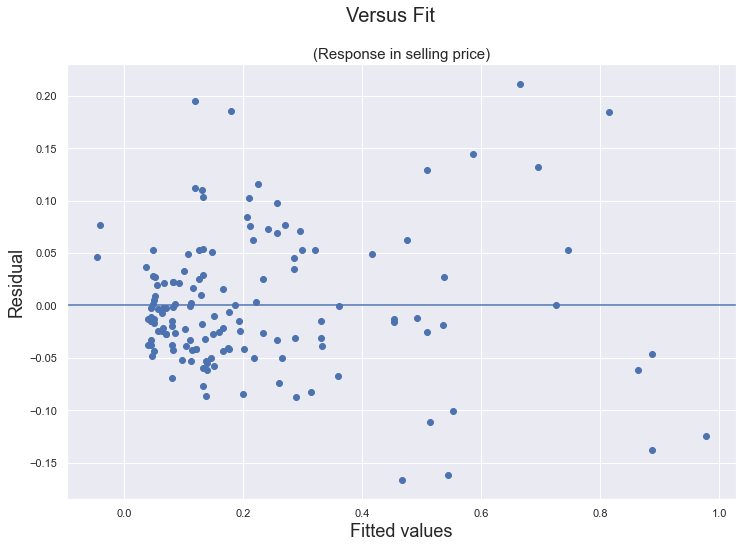

In [65]:
#Tests for Heteroscedasticity
resid = lm_5.resid
fig = plt.figure(figsize = (12,8))
plt.scatter(y_train_pred, resid)
fig.suptitle('Versus Fit', fontsize = 20)  
plt.title('(Response in selling price)',  fontsize = 15)       
plt.xlabel('Fitted values', fontsize = 18)
plt.ylabel('Residual', fontsize = 18)           
plt.axhline(0, 0,8)
plt.show()

We observe that residuals are randomly distributed and there is no definite pattern observed. Thus basic assumption of linear regression for residual terms i.e homoscedasticity is satisfied.

Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, let us now make predictions using our final model.

Applying the scaling on the test sets.

In [66]:
num_vars = ['symboling','carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
           'boreratio', 'wheelbase', 'price', 'fuel_economy']

car_test[num_vars] = scaler.transform(car_test[num_vars])

In [67]:

car_test.describe()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000
mean,0.583871,0.559481,0.480376,0.428470,0.265673,0.248858,0.556580,0.437764,0.239439,0.344661,0.887097,0.177419,0.564516,0.419355,0.080645,0.338710,0.451613,0.096774,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.048387,0.064516
std,0.271724,0.189947,0.165440,0.179488,0.162820,0.163376,0.228484,0.212861,0.233076,0.175037,0.319058,0.385142,0.499868,0.497482,0.274512,0.477134,0.501716,0.298064,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.216335,0.247676
min,0.000000,0.056911,0.183333,0.128394,0.067925,0.016667,-0.111111,0.000000,0.007763,0.002743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.400000,0.459350,0.358333,0.305275,0.177358,0.107292,0.404762,0.313793,0.092342,0.192387,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.600000,0.547967,0.441667,0.406129,0.226415,0.218750,0.563492,0.387931,0.158991,0.326475,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.800000,0.719919,0.516667,0.564876,0.316038,0.295833,0.746032,0.570690,0.317243,0.451303,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,1.089431,0.975000,0.935609,0.932075,0.662500,0.888889,1.182759,1.112855,0.747599,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


#Dividing into X_test and y_test

In [68]:
y_test = car_test.pop('price')
X_test = car_test

In [69]:

col=X_train_5.columns[1:]
X_test_5 = X_test[col]

In [70]:

# Adding a constant variable 
import statsmodels.api as sm  
X_test_5 = sm.add_constant(X_test_5)

In [71]:
X_test_5.shape

(62, 8)

In [72]:
# making predictions usingthe final model
y_pred_5 = lm_5.predict(X_test_5)

In [73]:
# Evaluate the r2
from sklearn.metrics import r2_score
r2 = r2_score(y_true = y_train, y_pred = y_train_pred)
print('Coefficient of determination for train data: %.3f' % r2) 

r2 = r2_score(y_true = y_test, y_pred = y_pred_5)
print('Coefficient of determination for test data: %.3f' % r2)

Coefficient of determination for train data: 0.909
Coefficient of determination for test data: 0.805



##### Since R2 for train set is 0.909 and R2 for test set is 0.805, we can say that what the model has learnt on the training set, it has been able to generalise very well on the test set as well.

In [74]:
#RMSE mean for test dataset
import math
from sklearn.metrics import mean_squared_error
Rmse = math.sqrt(mean_squared_error(y_test, y_pred_5)) 
print('Root mean square error: %.3f' % Rmse)

Root mean square error: 0.102


The RMSE is analogous to the standard deviation and is a measure of how large your residuals are spread out. Since error is very low, we can say that our model is performing very well.

#Model Evaluation.
#Let's now plot the graph for actual versus predicted values.

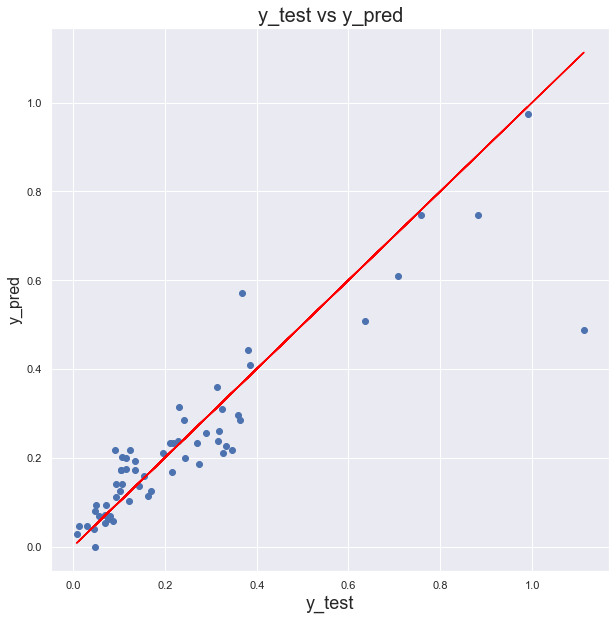

In [75]:

# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_5)
plt.title('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.plot(y_test, y_test, color="red")

It seems like the predicted values are really good. Actual scores and predicted scores have almost perfect linearity. WE might achieve a more better relation if we treat the outliers but since our dataset is small we choose not to deal with them as we might end up loosing vital information.

#### Conclusions

Following are the conclusions based on the model we built.

1.R-sqaured and Adjusted R-squared (extent of fit) are 0.909 and 0.805, respectively - 85% variance explained.
2.F-stats and Prob(F-stats) (overall model fit) is 192.0 and 6.44e-60(approx. 0.0) respectively - Model fit is significant and explained 87% variance is just not by chance.
3.p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. This indicates that all the predictors are statistically significant.

Thus, we say that the model will be a good way for management to understand the pricing dynamics of a new market.

Following are the variables that are significant in predicting the price of a car:

Horsepower
wheelbase
carbody (hatchback)
carbody (wagon)
Luxury cars (Cars that are very expensive or high-end).